In [79]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
import pandas as pd

df_data = [[6.6, 3.2],
           [7.0, 4.8],
           [8.2, 4.4],
           [6.5, 5.5],
           [8.9, 5.2],
           [6.9, 5.9]]

target = [0, 1, 1, 0, 0, 0]

df = pd.DataFrame(df_data, columns=['m', 'd'])
df['Target'] = target

print(df)


     m    d  Target
0  6.6  3.2       0
1  7.0  4.8       1
2  8.2  4.4       1
3  6.5  5.5       0
4  8.9  5.2       0
5  6.9  5.9       0


<Axes: xlabel='m', ylabel='d'>

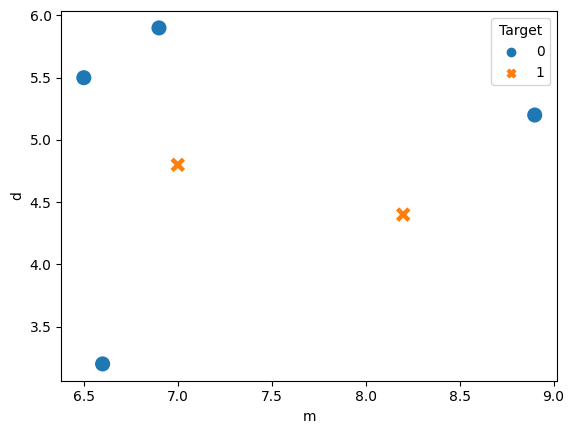

In [81]:
sns.scatterplot(x='m', y='d', data=df, hue='Target', style='Target', s=140)

In [82]:
x = df.drop('Target', axis=1)
y = df.Target

<h3>Feature Scaling</h3>

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x)

y_train = y

In [84]:
df_sc = pd.DataFrame(x_train, columns=['d', 'm'])
df_sc['target'] = y_train
df.head()

,m,d,Target
0,6.6,3.2,0
1,7.0,4.8,1
2,8.2,4.4,1
3,6.5,5.5,0
4,8.9,5.2,0


<h3>MPL Classifier</h3>

In [85]:
from sklearn.neural_network import MLPClassifier

In [86]:
model = MLPClassifier(random_state=1, verbose=True, max_iter=1000, hidden_layer_sizes=(4))
model.fit(x_train, y_train)

Iteration 1, loss = 0.57936118
Iteration 2, loss = 0.57868093
Iteration 3, loss = 0.57800734
Iteration 4, loss = 0.57734050
Iteration 5, loss = 0.57668049
Iteration 6, loss = 0.57602738
Iteration 7, loss = 0.57538119
Iteration 8, loss = 0.57474193
Iteration 9, loss = 0.57410960
Iteration 10, loss = 0.57348414
Iteration 11, loss = 0.57286546
Iteration 12, loss = 0.57225345
Iteration 13, loss = 0.57164793
Iteration 14, loss = 0.57104874
Iteration 15, loss = 0.57045567
Iteration 16, loss = 0.56986852
Iteration 17, loss = 0.56928709
Iteration 18, loss = 0.56871119
Iteration 19, loss = 0.56814061
Iteration 20, loss = 0.56757519
Iteration 21, loss = 0.56701475
Iteration 22, loss = 0.56645910
Iteration 23, loss = 0.56590807
Iteration 24, loss = 0.56536149
Iteration 25, loss = 0.56481918
Iteration 26, loss = 0.56428097
Iteration 27, loss = 0.56374671
Iteration 28, loss = 0.56321623
Iteration 29, loss = 0.56270114
Iteration 30, loss = 0.56219012
Iteration 31, loss = 0.56167456
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=4, max_iter=1000, random_state=1, verbose=True)

In [87]:
print('score : ',model.score(x_train, y_train))
print('predict : ', model.predict(x_train))
print('target : ',np.array(y))

score :  1.0
predict :  [0 1 1 0 0 0]
target :  [0 1 1 0 0 0]


In [88]:
[coef.shape for coef in model.coefs_]

[(2, 4), (4, 1)]

In [89]:
print(model.coefs_) #weight

[array([[-0.58413801,  0.3586415 , -1.90982308, -0.32712712],
       [-1.71638975, -1.08348691, -0.42618267, -1.24690827]]), array([[-1.65890619],
       [ 1.11689112],
       [-1.98994399],
       [ 1.48359515]])]


In [90]:
print(model.intercepts_) # Bias

[array([-0.29561454, -0.17089125, -0.76848048,  1.09511023]), array([-1.02258453])]


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(x_train)

class_name = ['Grape', 'Lemon']

print('Score -> {:.4f}'.format(model.score(x_train, y_train)))
print(classification_report(y_train, y_predict, target_names=class_name))
print(confusion_matrix(y_train, y_predict))

Score -> 1.0000
              precision    recall  f1-score   support

       Grape       1.00      1.00      1.00         4
       Lemon       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[4 0]
 [0 2]]


Text(0.5, 1.0, 'Confusion Matrix')

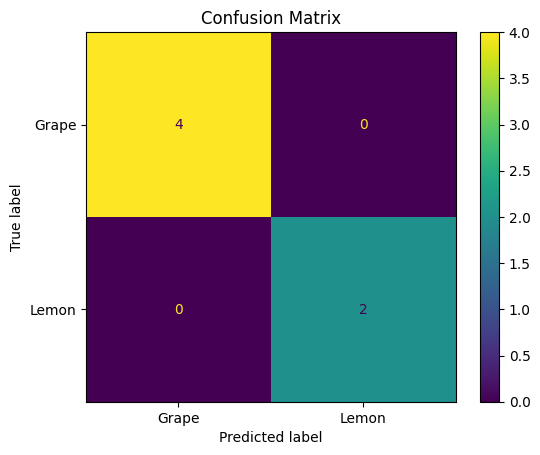

In [92]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_name).plot()
plt.title('Confusion Matrix')

Text(0, 0.5, 'd (dimention)')

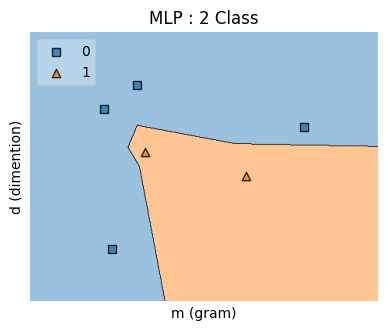

In [93]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(x_train, np.array(y_train), clf=model, legend=2)

plt.title("MLP : 2 Class")
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (dimention)')

<h3>Loss Curve</h3>

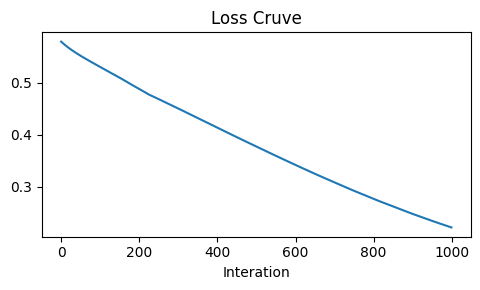

In [94]:
plt.figure(figsize=(5, 3))
plt.title('Loss Cruve')
plt.xlabel('Interation')
plt.plot(model.loss_curve_)
plt.tight_layout()